# 1. Centrality Analysis

In [13]:
#!conda install networkx --yes

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
print(nx.info(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


C:\Users\USER\AppData\Local\Temp\ipykernel_27160\2580942427.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


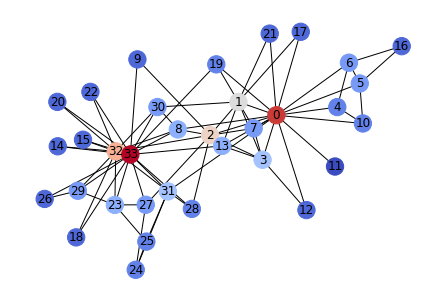

In [15]:
def simple_pagerank(G):
    p = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return p

values = simple_pagerank(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

## Calculate page rank by updating the centrality of each node with the iteration

(34,)


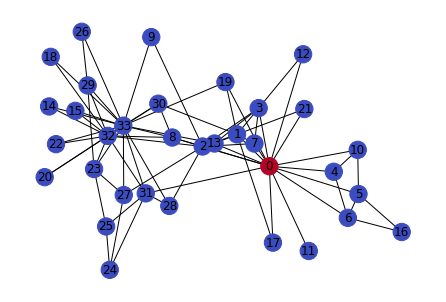

In [16]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


values = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [17]:
G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print(nx.info(G))
G1 = G.subgraph(list(G.nodes())[100:150])
print(nx.info(G1))

Graph with 6175 nodes and 15969 edges
Graph with 50 nodes and 42 edges


C:\Users\USER\AppData\Local\Temp\ipykernel_27160\973125873.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))
C:\Users\USER\AppData\Local\Temp\ipykernel_27160\973125873.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G1))


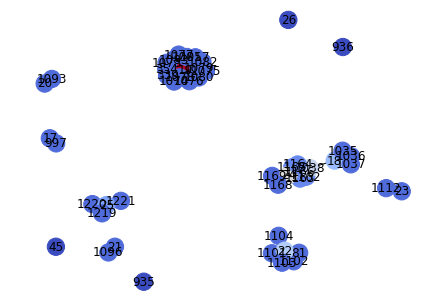

In [18]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


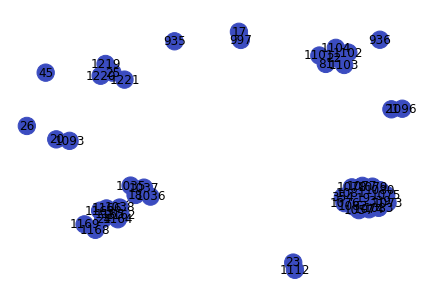

In [19]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

# 2. Community Analysis (OPTIONAL)

# 3. Information Diffusion
It is also known as graph activation process, e.g. http://ncase.me/crowds/

Further readings:
* https://stackoverflow.com/questions/31815454/animate-graph-diffusion-with-networkx
* https://stackoverflow.com/questions/27475211/animating-a-network-graph-to-show-theprogress-of-an-algorithm/

34

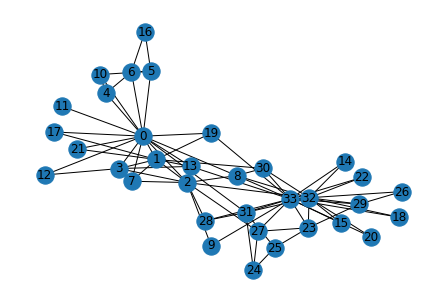

In [20]:
from __future__ import print_function, division
%matplotlib inline

import networkx as nx
import numpy as np

G = nx.karate_club_graph()
nx.draw(G, with_labels=True)
len(G.nodes)

## 3.1. Diffusion process
Now we implement the diffusion process. Each active node will cause other nodes in the graph to
become active over time. The diffusion rule is that a node gets active if at least a certain percentage of its neighbours become active. The process continues until convergence (i.e. has no new node
activated).

OPTIONAL: Can you implement a data visualization to illustrate the diffusion process?

In [21]:
def diffusion(graph, seed_set, thr=0.5):
    active = seed_set
    has_changed = False
    
    # TODO: loop through not active nodes and activate a node of more than "thr" percent of its neighbors are active
    for n in filter (lambda n: n not in active, graph.nodes()):
        if len(list(filter(lambda neighbor: neighbor in active, graph.neighbors(n)))) >= thr * len(list(graph.neighbors(n))):
            active.add(n)
            has_changed = True
    if has_changed:
        return diffusion(graph, active, thr) # union of two sets
    return active

diffusion(G, {0,1})

{0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21}

## 3.2. Influence maximization
Now we find a minimal set of seeds that maximize the influence (i.e. the number of active nodes).
The influence maximization problem is NP-hard in general. Here, we use a greedy algorithm that
iteratively chooses a seed such that the gain of influence is maximal.

In [22]:
def utility(graph, seeds, thr=0.5):
    return len(diffusion(graph, seeds.copy(), thr))

def greedy(graph, k=3, thr=0.5):
    seeds = set()
    for i in range(k):
        max_gain = 0
        chosen_seed = -1
        
        # TODO: greedily choose the node as seed with maximal utility gain
        for n in graph.nodes():
            gain = utility(graph, seeds | {n}) - utility(graph, seeds)
            if gain > max_gain:
                max_gain = gain
                chosen_seed = n
        if max_gain > 0:
            seeds = seeds | {chosen_seed}
        else:
            break
    return seeds

seeds = greedy(G,3)
print(seeds)
print(utility(G, seeds))

{0, 33, 4}
34


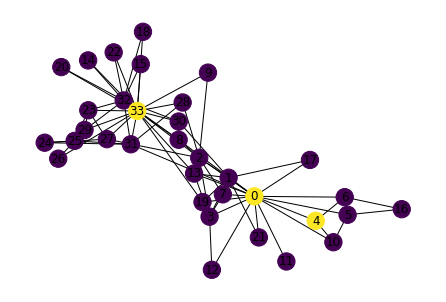

In [23]:
active_nodes = seeds
cmap = []
for n in G.nodes():
    if n in active_nodes:
        cmap.append(1)
    else:
        cmap.append(0)
        
nx.draw(G, node_color = cmap, with_labels=True)

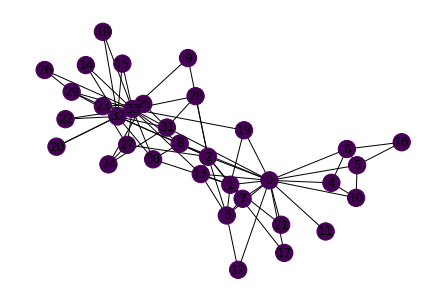

In [24]:
active_nodes = diffusion(G, seeds)
cmap = []
for n in G.nodes():
    if n in active_nodes:
        cmap.append(1)
    else:
        cmap.append(0)
        
nx.draw(G, node_color = cmap, with_labels=True)